# ML Extension

In [1]:
from numpy import *
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

In [2]:
# Clean security_deposit  
def clean_dollar(df, feature):   
    try: 
        df[feature] = df[feature].str.replace("$","")
        df[feature] = df[feature].str.replace(",","")
        df[feature]  = pd.to_numeric(df[feature], downcast = 'float')
    except: 
        print("already converted")

## Loading data

In [3]:
from tqdm import tqdm
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
try: 
    # Paden Joran 
    calendar_detail = pd.read_csv("calendar_detail.csv")
    listings_detail = pd.read_csv("listings_detail.csv")
    listings_summary = pd.read_csv("listings_summary.csv")
    neighbourhoods = pd.read_csv("neighbourhoods.csv")
    reviews_detail = pd.read_csv("reviews_detail.csv")
    reviews_summary = pd.read_csv("reviews_summary.csv")
    with open('neighbourhoods.geojson') as f:
        neighbourhoods_geojson = json.load(f)
except: 
    print("Files not found")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cal_det_available = calendar_detail[calendar_detail['available'] == 't']
try: 
    cal_det_available['price'] = cal_det_available['price'].str.replace("$","")
    cal_det_available['price'] = cal_det_available['price'].str.replace(",","")
    cal_det_available.price = pd.to_numeric(cal_det_available.price, downcast = 'float')
except: 
    print("Already converted")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## Additional output

In [5]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

##### Inspect the prices

In [6]:
# Clean price 
try:
    listings_detail['price'] = listings_detail['price'].str.replace("$","")
    listings_detail['price'] = listings_detail['price'].str.replace(",","")
    listings_detail.price = pd.to_numeric(listings_detail.price, downcast = 'float')
except: 
    pass

In [7]:
prices_freq = {}
for price in listings_detail['price']:
    if price not in prices_freq.keys():
        prices_freq[price] = 1
    else: 
        prices_freq[price] += 1

In [8]:
prices = list(prices_freq.keys())
freq = list(prices_freq.values())
prices_freq_df = pd.DataFrame({
    'prices' : prices,
    'freq' : freq
})
prices_freq_df.head()
prices_freq_df_filtered = prices_freq_df[(prices_freq_df.prices > 10) & (prices_freq_df.prices < 400)]

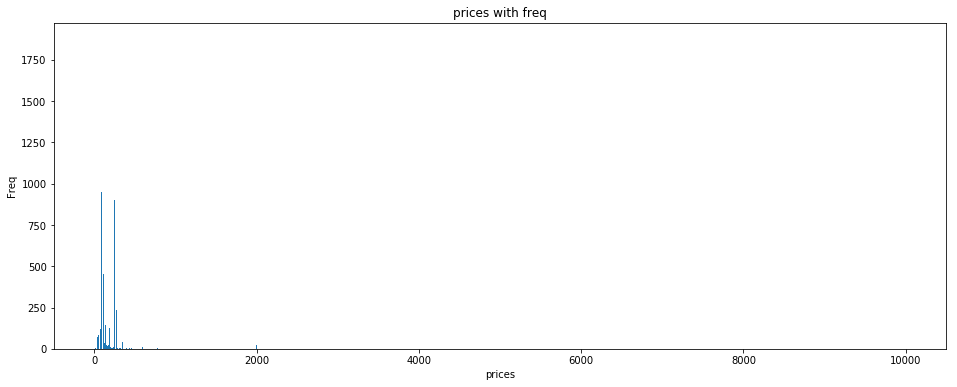

In [9]:
# try to plot the prices
prices = list(prices_freq.keys())
freq = list(prices_freq.values())

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(16, 6))
Ys = freq
Xs = prices
plt.bar(Xs, Ys)
plt.title('prices with freq')
plt.xlabel('prices')
plt.ylabel('Freq')
plt.show()

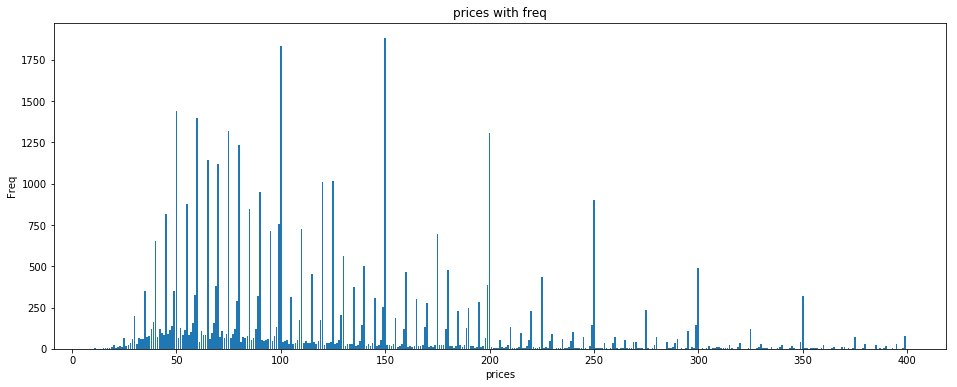

In [10]:
# Second try
figure(num=None, figsize=(16, 6))
Ys = prices_freq_df_filtered.freq
Xs = prices_freq_df_filtered.prices
plt.bar(Xs, Ys)
plt.title('prices with freq')
plt.xlabel('prices')
plt.ylabel('Freq')
plt.show()

Clear spikes at 100, 150, 200, 250, 300, 350, 400

In [11]:
# First test to make price buckets
bucketed_prices_freq = {
    "0-25" : 0,
    "26-75" : 0,
    "76-125" : 0,
    "126-175" : 0,
    "176-225" : 0,
    "226-275" : 0,
    "276-325" : 0,
    "326-375" : 0,
    "376-425" : 0,
    "425+" : 0
}
for price in prices_freq_df.prices:
    if price <= 25:
        # add the freq that is related to that certain price
        bucketed_prices_freq["0-25"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 26 <= price <= 75:
        bucketed_prices_freq["26-75"] += int(prices_freq_df[prices_freq_df.prices == price].freq)
    elif 76 <= price <= 125:
        bucketed_prices_freq["76-125"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 126 <= price <= 175:
        bucketed_prices_freq["126-175"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 176 <= price <= 225:
        bucketed_prices_freq["176-225"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 226 <= price <= 275:
        bucketed_prices_freq["226-275"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 276 <= price <= 325:
        bucketed_prices_freq["276-325"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 326 <= price <= 375:
        bucketed_prices_freq["326-375"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 376 <= price <= 425:
        bucketed_prices_freq["376-425"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 426 <= price:
        bucketed_prices_freq["425+"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 

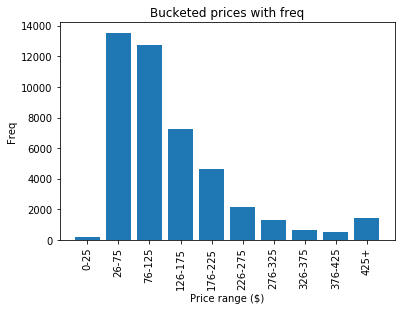

In [12]:
bucketed_prices_freq
Xs = list(bucketed_prices_freq.keys())
Ys = list(bucketed_prices_freq.values())
plt.bar(Xs, Ys)
plt.title('Bucketed prices with freq')
plt.xlabel('Price range ($)')
plt.ylabel('Freq')
plt.xticks(Xs, Xs, rotation=90)
plt.show()

In [13]:
# Group some buckets together to get +- equal number of observations in every bucket 

In [14]:
# 4 categories
bucketed_prices_freq = {
    "0-74" : 0,
    "75-124" : 0,
    "125-224" : 0,
    "225 and more" : 0
}
for price in prices_freq_df.prices:
    if price < 75:
        # add the freq that is related to that certain price
        bucketed_prices_freq["0-74"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 75 <= price < 125:
        bucketed_prices_freq["75-124"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 
    elif 125 <= price < 225:
        bucketed_prices_freq["125-224"] += int(prices_freq_df[prices_freq_df.prices == price].freq)
    elif 225 <= price:
        bucketed_prices_freq["225 and more"] += int(prices_freq_df[prices_freq_df.prices == price].freq) 

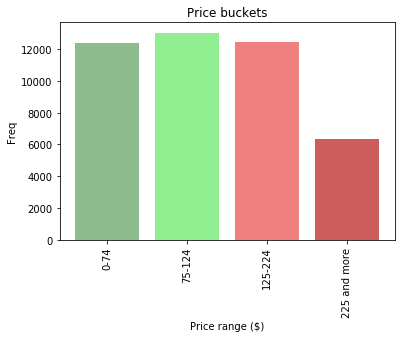

In [26]:
bucketed_prices_freq
Xs = list(bucketed_prices_freq.keys())
Ys = list(bucketed_prices_freq.values())
plt.bar(Xs, Ys, color = ("darkseagreen", 
                           "lightgreen", 
                           "lightcoral", 
                           "indianred"))
plt.title('Price buckets')
plt.xlabel('Price range ($)')
plt.ylabel('Freq')
plt.xticks(Xs, Xs, rotation=90)
plt.show()

This looks fine to start with

In [293]:
# Make extra column which contains the label
def label_price(row):
    if row['price'] < 75:
        return 'Relatively cheap'
    elif 75 <= row['price'] < 125:
        return 'Moderate'
    elif 125 <= row['price'] < 225:
        return 'Expensive'
    elif 225 <= row['price']:
        return 'Very expensive'

In [294]:
listings_detail['price_bucket'] = listings_detail.apply(lambda row: label_price(row), axis = 1)

##### Inspect the features

###### host_response_time

In [295]:
listings_detail.host_response_time.unique()

array([nan, 'within an hour', 'within a few hours', 'a few days or more',
       'within a day'], dtype=object)

In [296]:
def plot_general_distribution(df, feature, xlabels = True):
    figure(num=None, figsize=(12, 6))
    val_counts = listings_detail[feature].value_counts(dropna=False)
    cats = np.array(list(val_counts.keys()))
    counts = list(val_counts)

    title = feature + ': counts'
    Ys = counts
    Xs = cats
    plt.bar(Xs, Ys)
    plt.title(title)
    plt.xlabel('Categories')
    plt.ylabel('counts')
    plt.xticks(Xs, Xs, rotation= 45)
    if xlabels == False:
        plt.tick_params(
            axis='x',          
            which='both',      
            bottom=False,      
            top=False,         
            labelbottom=False)
    plt.show()

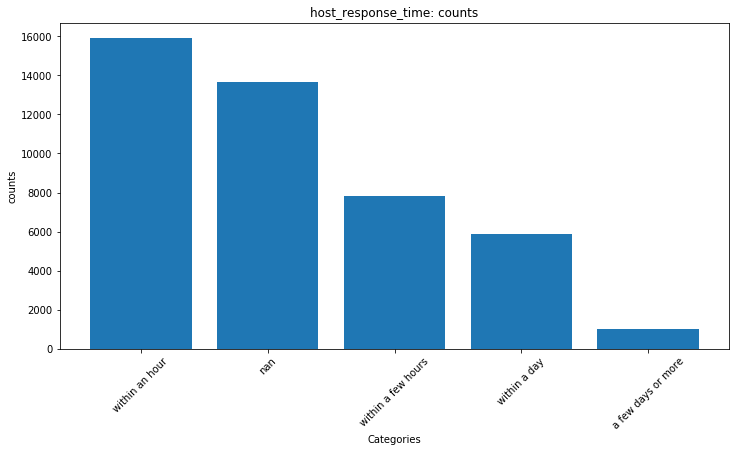

In [297]:
# Plot distribution
plot_general_distribution(listings_detail, 'host_response_time')

In [298]:
listings_detail['host_response_time'][listings_detail['host_response_time'] == 'a few days or more'] = 'within '

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [299]:
### 'a few days or more' together with 'within a few days'
listings_detail['host_response_time'] = listings_detail['host_response_time'].apply(lambda x: 'longer than a few hours' if x == 'a few days or more' else x)
listings_detail['host_response_time'] = listings_detail['host_response_time'].apply(lambda x: 'longer than a few hours' if x == 'within a day' else x)

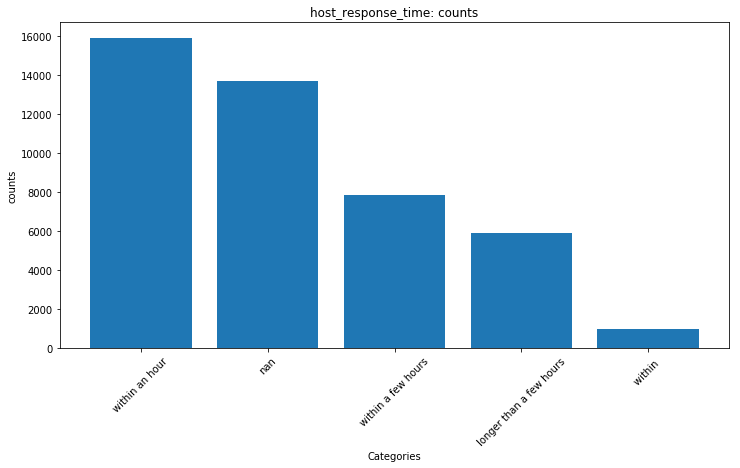

In [300]:
# Plot distribution
plot_general_distribution(listings_detail, 'host_response_time')

Too many Nan's

###### host_response_rate

In [301]:
listings_detail.host_response_rate.unique()

array([nan, '100%', '33%', '75%', '84%', '90%', '80%', '0%', '70%', '99%',
       '50%', '69%', '88%', '71%', '67%', '89%', '83%', '60%', '14%',
       '86%', '56%', '97%', '98%', '91%', '78%', '95%', '87%', '57%',
       '38%', '96%', '94%', '20%', '73%', '93%', '40%', '17%', '82%',
       '25%', '79%', '92%', '63%', '58%', '43%', '77%', '29%', '30%',
       '44%', '36%', '53%', '64%', '85%', '81%', '74%', '10%', '76%',
       '46%', '65%', '27%', '54%', '55%', '66%', '68%', '21%', '61%',
       '72%', '26%', '22%', '15%', '52%', '6%', '41%', '47%', '35%',
       '62%', '59%'], dtype=object)

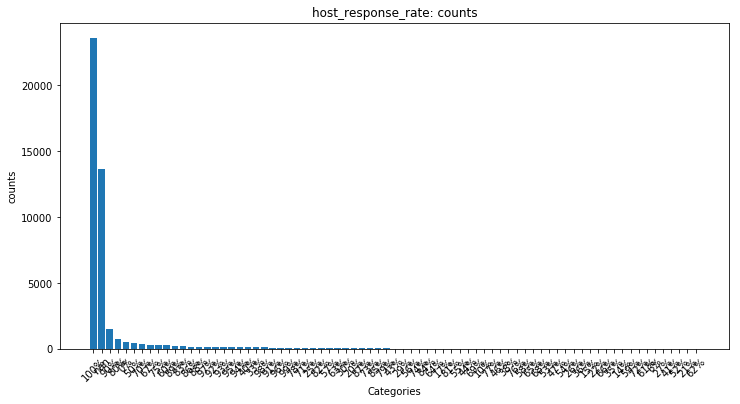

In [302]:
plot_general_distribution(listings_detail, 'host_response_rate')

In [303]:
# Less interesting to use at first sight. Might need some bucketing

###### host_is_superhost

In [304]:
listings_detail.host_is_superhost.unique()

array(['f', 't', nan], dtype=object)

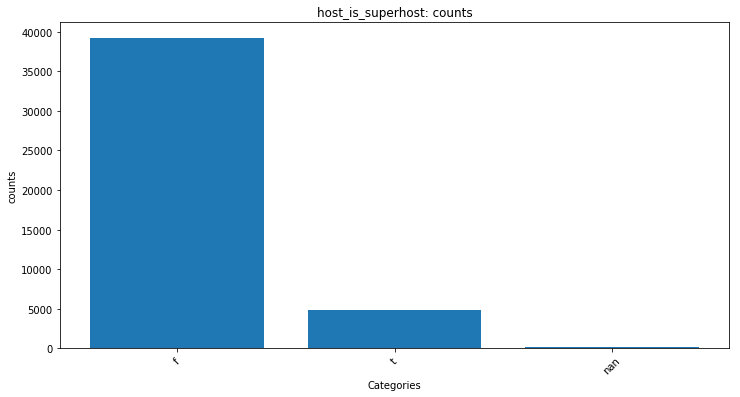

In [305]:
plot_general_distribution(listings_detail, 'host_is_superhost')

In [306]:
# Bring NaN to false
listings_detail['host_is_superhost'] = listings_detail['host_is_superhost'].fillna('f')
listings_detail['host_is_superhost'] = listings_detail['host_is_superhost'].apply(lambda x : 1 if x == 't' else 0)

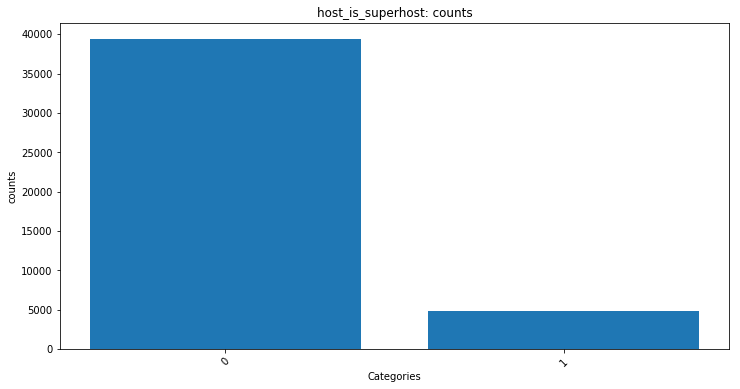

In [307]:
plot_general_distribution(listings_detail, 'host_is_superhost')

###### host_neighbourhood

In [308]:
len(listings_detail.host_neighbourhood.unique())

401

In [309]:
# This one can possibly be clustered before using it as a feature. This is out of scope for this report

###### calculated_host_listings_count

In [310]:
listings_detail.calculated_host_listings_count.unique()

array([ 1,  4,  5,  3,  2,  8,  6,  7,  9, 11, 15, 12, 10, 35, 13, 16, 28,
       31], dtype=int64)

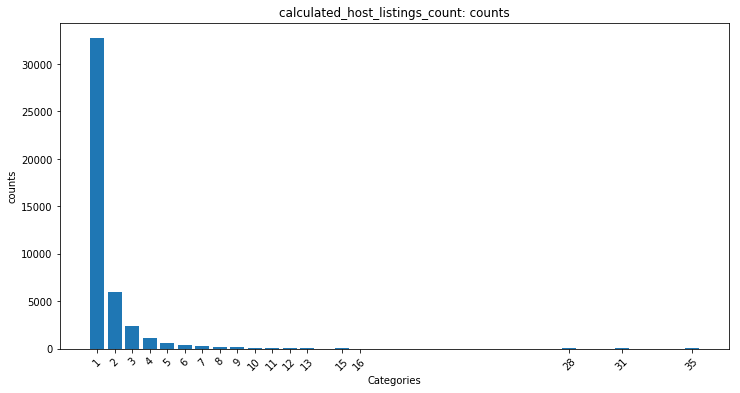

In [311]:
plot_general_distribution(listings_detail, 'calculated_host_listings_count')

In [312]:
# Divide into one or more
listings_detail['calculated_host_listings_count_buckets'] = listings_detail['host_listings_count'].apply(lambda x: 'Just one' if x == 1 else 'Multiple')

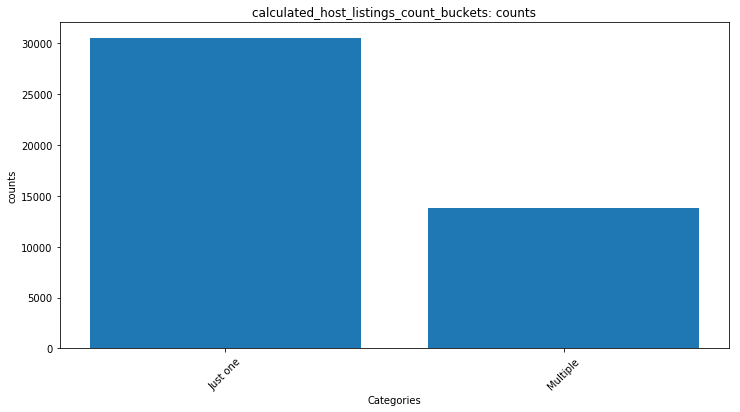

In [313]:
plot_general_distribution(listings_detail, 'calculated_host_listings_count_buckets')

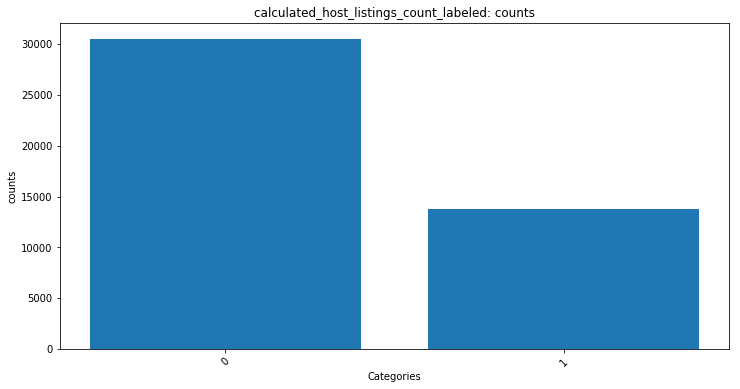

In [447]:
listings_detail['calculated_host_listings_count_labeled'] = LabelEncoder().fit_transform(listings_detail['calculated_host_listings_count_buckets'])
plot_general_distribution(listings_detail, 'calculated_host_listings_count_labeled')

In [314]:
# Best we can make of it

######  host_total_listings_count

In [315]:
listings_detail.host_total_listings_count.unique()

array([  1.,   4.,   5.,   3.,   2.,   8.,   6.,   0.,  nan,  12.,  16.,
        11.,   9.,  24.,  14.,   7.,  20.,  15.,  10.,  19.,  47.,  23.,
        22.,  35.,  17.,  13.,  39., 236.,  27., 296.,  94., 979.,  18.,
        31.,  41.,  28., 159.,  46.,  21.,  49., 113.,  38.,  42.,  33.,
       258.,  54., 248.,  25.,  85., 316.,  52.,  64.,  56., 149., 648.,
        83.,  36., 218.])

In [316]:
# This is the same as above, but less useful

###### host_has_profile_pic

In [317]:
listings_detail.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

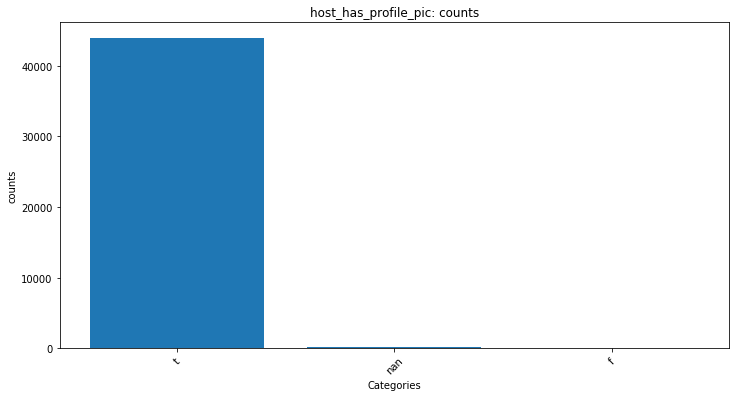

In [318]:
plot_general_distribution(listings_detail, 'host_has_profile_pic')

In [319]:
# Mostly true, so we don't expect this to add a lot of value 

In [320]:
# Bring NaN to true (mode)
listings_detail['host_has_profile_pic'] = listings_detail['host_has_profile_pic'].fillna('t')
listings_detail['host_has_profile_pic'] = listings_detail['host_has_profile_pic'].apply(lambda x : 1 if x == 't' else 0)

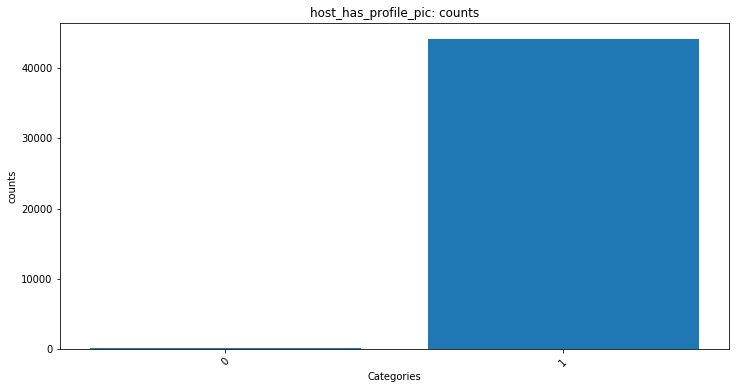

In [321]:
plot_general_distribution(listings_detail, 'host_has_profile_pic')

###### host_identity_verified

In [322]:
listings_detail.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

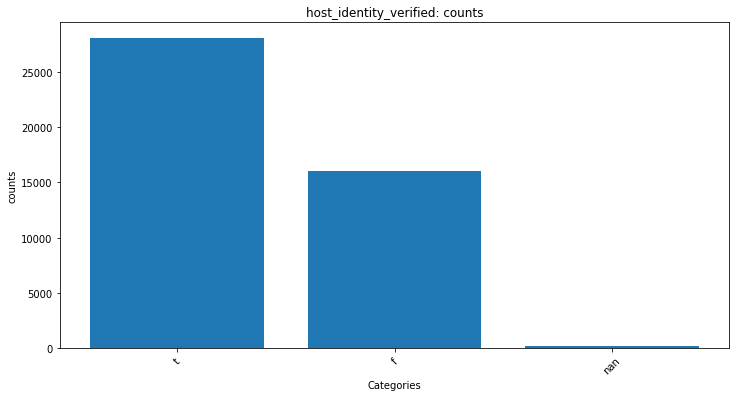

In [323]:
plot_general_distribution(listings_detail, 'host_identity_verified')

In [324]:
# Bring NaN to true (mode)
listings_detail['host_identity_verified'] = listings_detail['host_identity_verified'].fillna('t')
listings_detail['host_identity_verified'] = listings_detail['host_identity_verified'].apply(lambda x : 1 if x == 't' else 0)

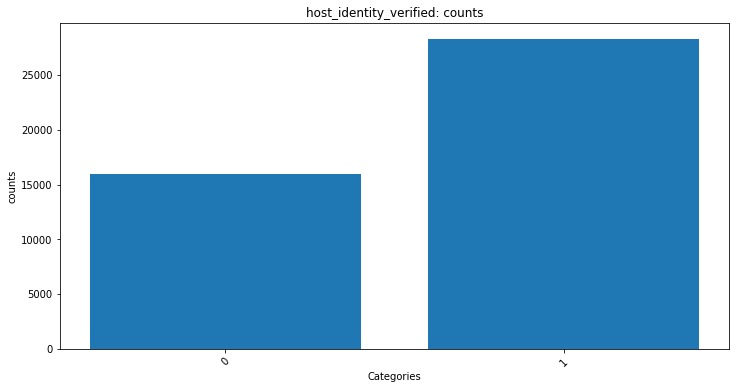

In [325]:
plot_general_distribution(listings_detail, 'host_identity_verified')

###### neighbourhood_cleansed

In [326]:
len(listings_detail.neighbourhood_cleansed.unique())

217

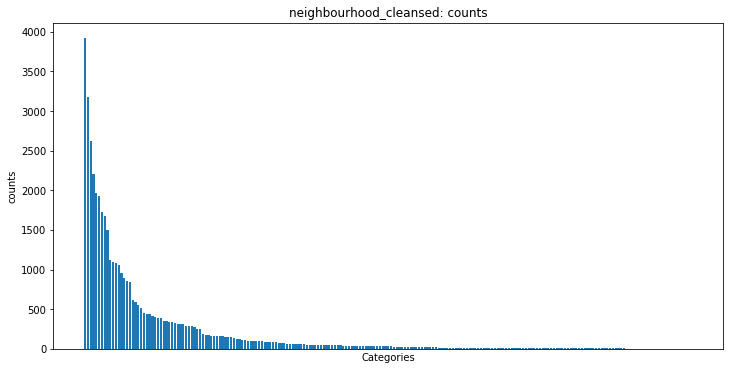

In [327]:
plot_general_distribution(listings_detail, 'neighbourhood_cleansed', xlabels = False)

In [328]:
# This has too many values. Although, after clustering, it could be a very interesting metric to incorporate

###### neighbourhood_group_cleansed

In [329]:
len(listings_detail.neighbourhood_group_cleansed.unique())

5

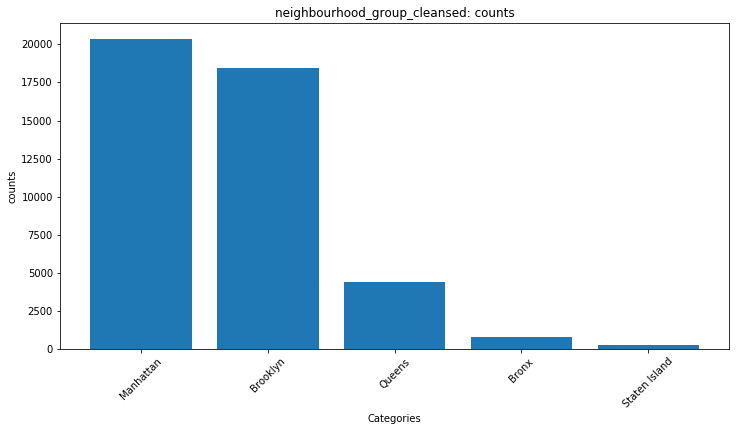

In [330]:
plot_general_distribution(listings_detail, 'neighbourhood_group_cleansed')

In [331]:
# The data is far from uniformly distributed. This might affect the results

In [332]:
# make labels
listings_detail['neighbourhood_group_cleansed_labeled'] = LabelEncoder().fit_transform(listings_detail['neighbourhood_group_cleansed'])

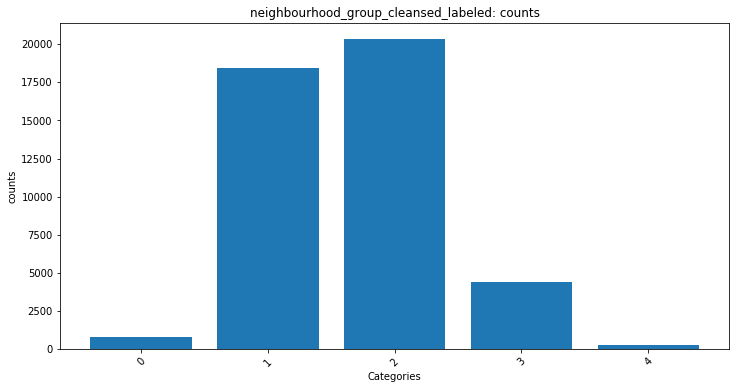

In [333]:
plot_general_distribution(listings_detail, 'neighbourhood_group_cleansed_labeled')

###### state 

In [334]:
listings_detail.state.unique()

array(['NY', 'MP', 'New York', 'ny', 'NJ', 'CA', 'VT'], dtype=object)

In [335]:
listings_detail.state = listings_detail.state.replace(['ny', 'New York'], 'NY') 
listings_detail.state.unique()

array(['NY', 'MP', 'NJ', 'CA', 'VT'], dtype=object)

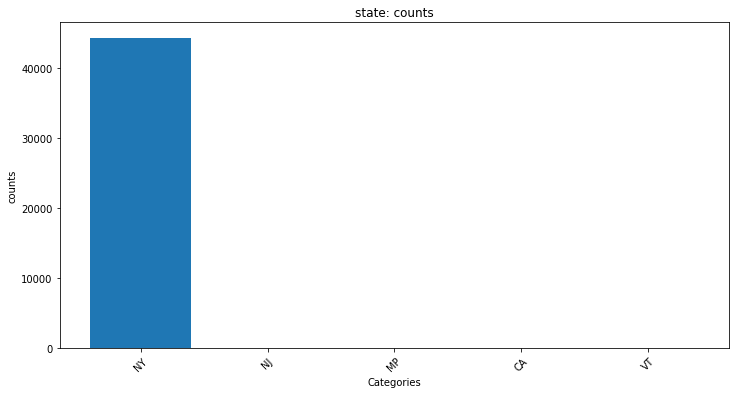

In [336]:
plot_general_distribution(listings_detail, 'state')

In [337]:
# This is a bad feature to use 

###### market 

In [338]:
len(listings_detail.market.unique())

25

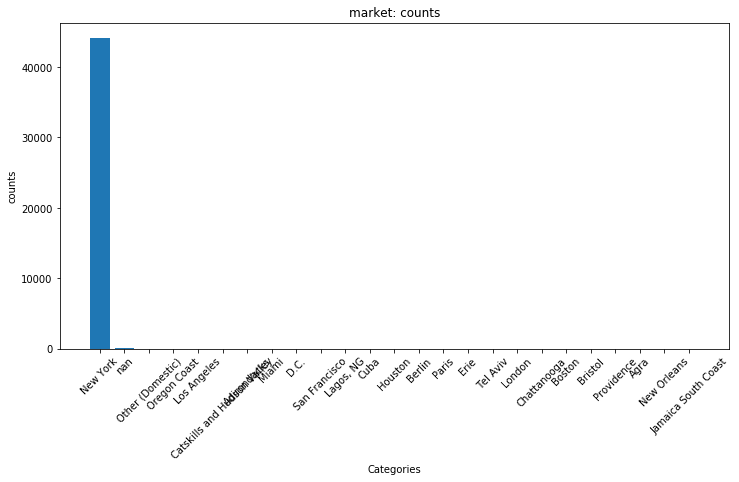

In [339]:
plot_general_distribution(listings_detail, 'market')

In [340]:
# This is also a bad feature to use 

###### country_code 

In [341]:
listings_detail.country_code.unique()

array(['US', 'UY'], dtype=object)

In [342]:
listings_detail['country_code'].value_counts(dropna=False)

US    44316
UY        1
Name: country_code, dtype: int64

In [343]:
# UY is probably a typo 

###### property_type  

In [344]:
len(listings_detail.property_type.unique())

28

In [345]:
listings_detail['property_type'].value_counts(dropna=False)

Apartment             37498
House                  3726
Loft                    879
Townhouse               817
Condominium             594
Other                   290
Bed & Breakfast         136
Timeshare                85
Guesthouse               58
Guest suite              54
Hostel                   39
Dorm                     28
Boutique hotel           25
Villa                    21
Bungalow                 19
Serviced apartment        9
Vacation home             9
Boat                      9
In-law                    6
Earth House               3
Chalet                    3
Cabin                     3
Tent                      1
Castle                    1
Treehouse                 1
Cave                      1
Yurt                      1
Train                     1
Name: property_type, dtype: int64

In [346]:
## Possibility is to look at different prices and then categorize (possible extention of the model)





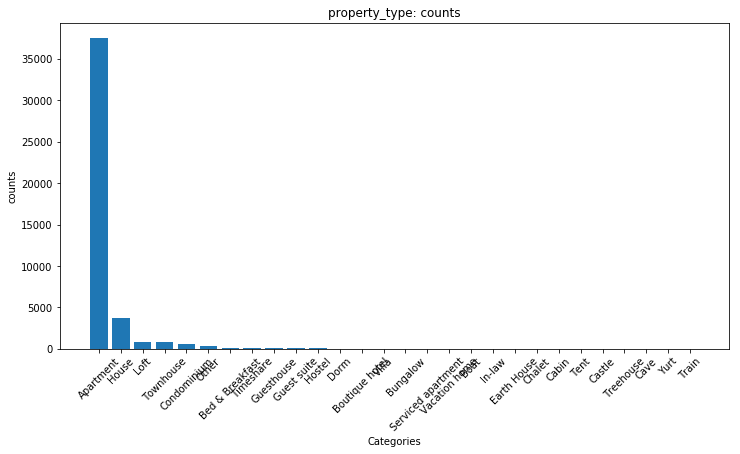

In [347]:
plot_general_distribution(listings_detail, 'property_type')

In [348]:
# Probably not a good feature 

###### room_type

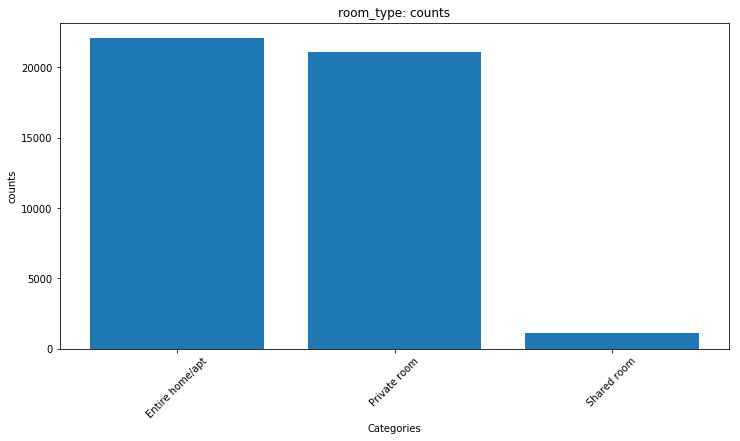

In [349]:
plot_general_distribution(listings_detail, 'room_type')

In [452]:
listings_detail['room_type_labeled'] = LabelEncoder().fit_transform(listings_detail['room_type'])

In [350]:
# Not a lot of values for shared room! (be cautious!)

###### accommodates

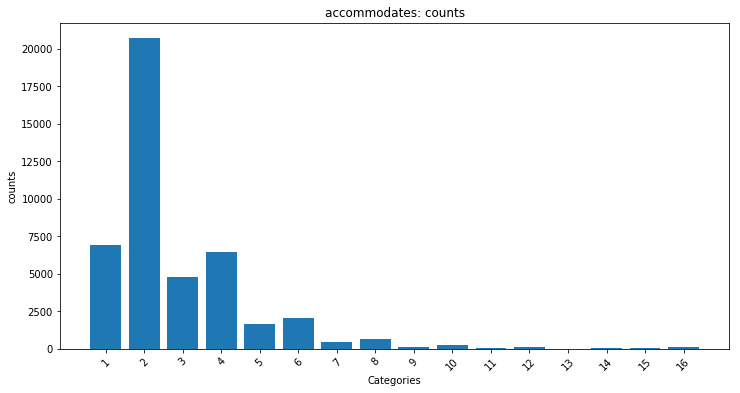

In [351]:
plot_general_distribution(listings_detail, 'accommodates')

In [352]:
# Group
val_counts = listings_detail.accommodates.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '1' : 0,
    '2' : 0,
    '3 to 4' : 0,
    'more than 5' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount == 1):
        freq['1'] += count_df.counts[i]
    elif(amount == 2):
        freq['2'] += count_df.counts[i]
    elif(3 <= amount <= 4):
        freq['3 to 4'] += count_df.counts[i]
    else: 
        freq['more than 5'] += count_df.counts[i]

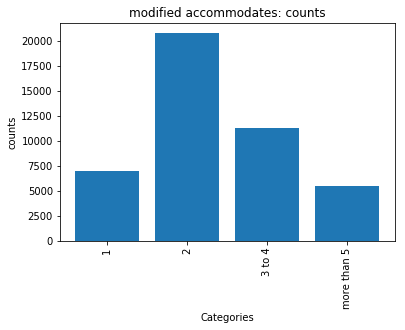

In [353]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified accommodates' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

In [354]:
# Generalize even more: 1 / 2 / multiple 

listings_detail['accommodates_buckets'] = listings_detail['accommodates'].apply(lambda x: 'Just one' if x == 1 else (
                                                                                'two' if x == 2 else 'multiple'))



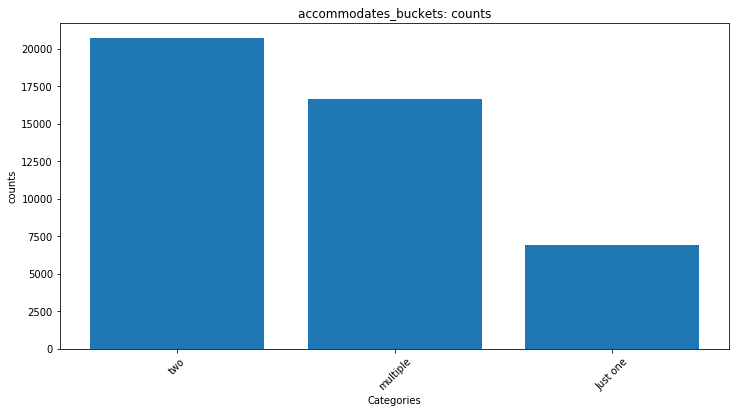

In [355]:
# Visual check
plot_general_distribution(listings_detail, 'accommodates_buckets')

In [356]:
# Label 
listings_detail['accommodates_labeled'] = LabelEncoder().fit_transform(listings_detail['accommodates_buckets'])

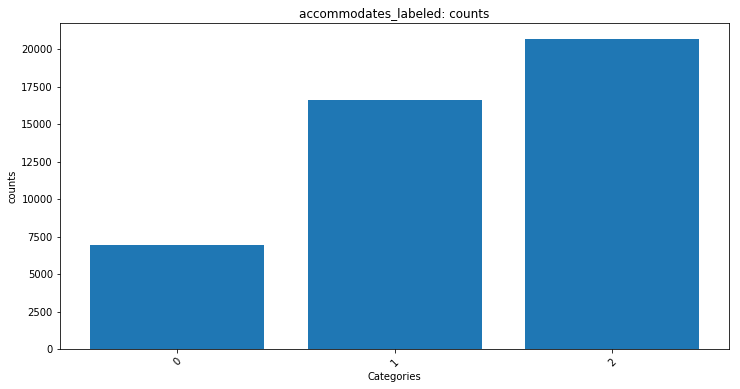

In [357]:
# Visual check
plot_general_distribution(listings_detail, 'accommodates_labeled')

###### bathrooms

In [358]:
len(listings_detail.property_type.unique())

28

In [359]:
listings_detail['bathrooms'].value_counts(dropna=False)

1.0     38014
2.0      3271
1.5      1874
2.5       374
3.0       264
NaN       144
4.0        97
0.0        84
0.5        80
3.5        62
5.0        18
4.5        14
6.0         8
5.5         5
8.0         5
15.5        1
7.0         1
6.5         1
Name: bathrooms, dtype: int64

In [360]:
# Fill NA values with the mode (= 1)
listings_detail['bathrooms'] = listings_detail['bathrooms'].fillna(1)

In [361]:
val_counts = listings_detail.bathrooms.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
bathrooms_count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '1' : 0,
    'more than 1' : 0
}
for i in range(0,len(bathrooms_count_df.categories)):
    amount = bathrooms_count_df.categories[i]
    if(amount <2):
        freq['1'] += bathrooms_count_df.counts[i]
    else:
        freq['more than 1'] += bathrooms_count_df.counts[i]
        

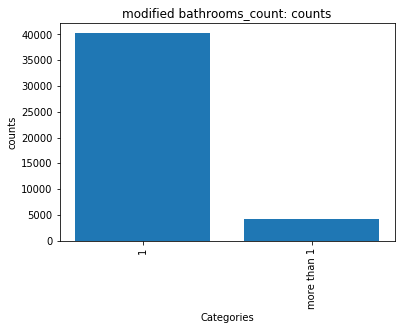

In [362]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified bathrooms_count' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

In [363]:
# bucketize
listings_detail['bathrooms_buckets'] = listings_detail['bathrooms'].apply(lambda x: 'Just one' if x == 1 else 'Multiple')

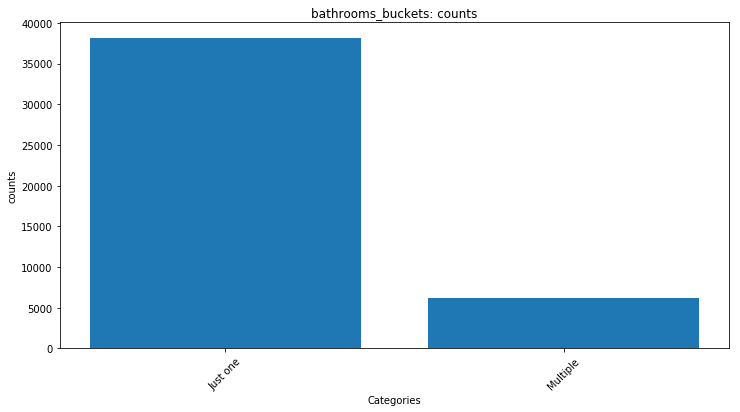

In [364]:
# Visual check
plot_general_distribution(listings_detail, 'bathrooms_buckets')

In [365]:
# Labelize
listings_detail['bathrooms_labeled'] = LabelEncoder().fit_transform(listings_detail['bathrooms_buckets'])

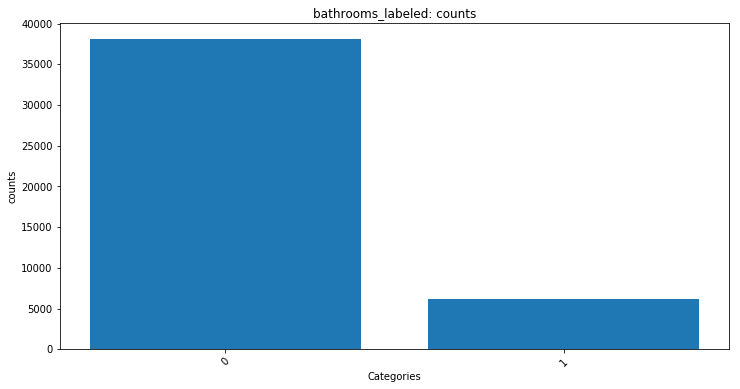

In [366]:
# Visual check
plot_general_distribution(listings_detail, 'bathrooms_labeled')

###### beds

In [367]:
len(listings_detail.property_type.unique())

28

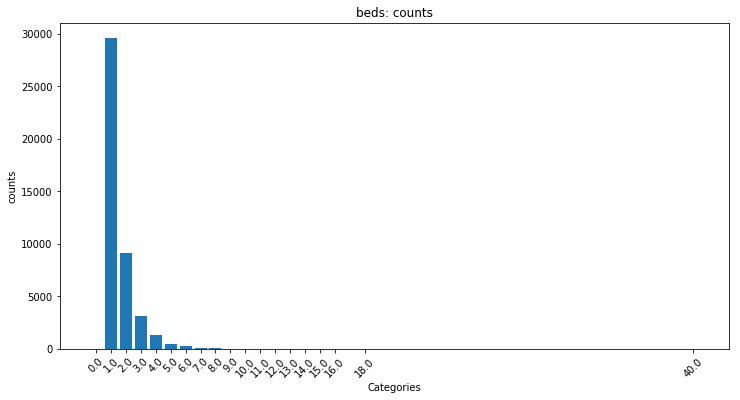

In [368]:
plot_general_distribution(listings_detail, 'beds')

In [369]:
# Group
val_counts = listings_detail.beds.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '1' : 0,
    '2' : 0,
    '3 to 4' : 0,
    'more than 5' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount == 1):
        freq['1'] += count_df.counts[i]
    elif(amount == 2):
        freq['2'] += count_df.counts[i]
    elif(3 <= amount <= 4):
        freq['3 to 4'] += count_df.counts[i]
    else: 
        freq['more than 5'] += count_df.counts[i]

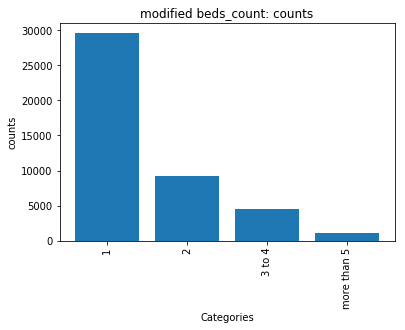

In [370]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified beds_count' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

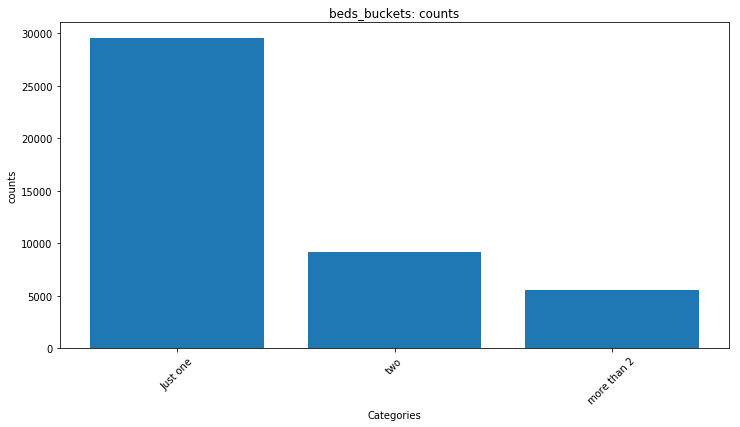

In [371]:
# Split in 1 / 2 / more than 2, but it will not be very nicely distributed
listings_detail['beds_buckets'] = listings_detail['beds'].apply(lambda x : 'Just one' if x == 1 else 
                                                               ('two' if x == 2 else 'more than 2'))
plot_general_distribution(listings_detail, 'beds_buckets')

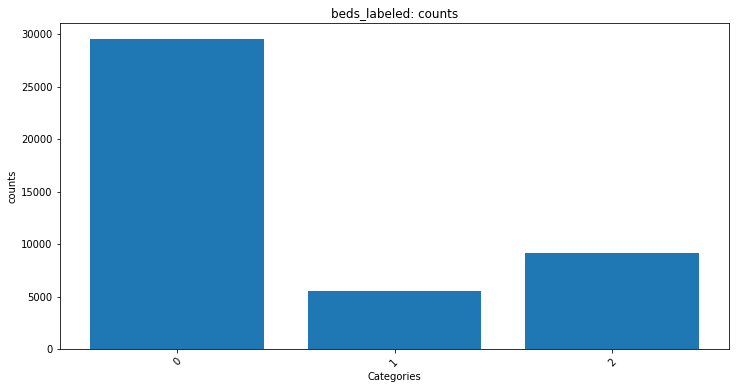

In [372]:
listings_detail['beds_labeled'] = LabelEncoder().fit_transform(listings_detail['beds_buckets'])
plot_general_distribution(listings_detail, 'beds_labeled')

In [373]:
# Alternative split: 1 vs more than 1

###### bed_type

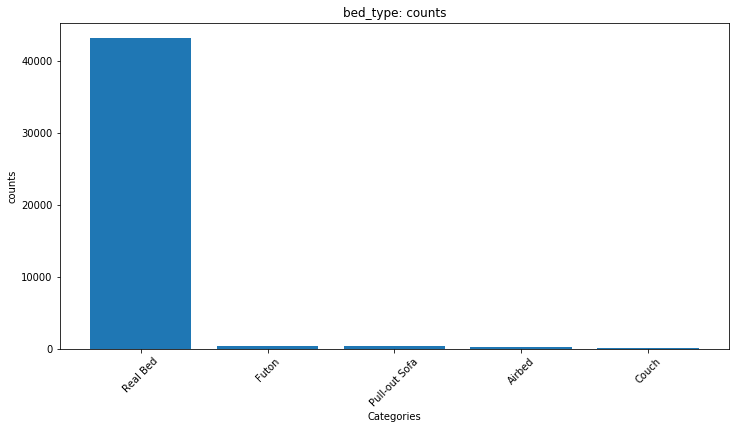

In [374]:
plot_general_distribution(listings_detail, 'bed_type')

In [375]:
# Bad feature

###### square_feet 

In [376]:
listings_detail.square_feet.describe()

count     549.000000
mean      727.732240
std       633.253518
min         0.000000
25%       325.000000
50%       700.000000
75%       925.000000
max      5000.000000
Name: square_feet, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FAC0AA6A0>]],
      dtype=object)

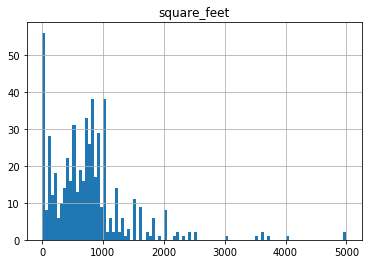

In [377]:
listings_detail.hist(column='square_feet', bins=100)

In [378]:
# Percentage missing 
sum(listings_detail['square_feet'].isnull()) / len(listings_detail)

0.9876119773450369

In [379]:
# Unfortunately, we cannot use this feature

###### security_deposit 

In [380]:
# Clean security_deposit  
listings_detail['security_deposit'] = listings_detail['security_deposit'].str.replace("$","")
listings_detail['security_deposit'] = listings_detail['security_deposit'].str.replace(",","")
listings_detail.security_deposit  = pd.to_numeric(listings_detail.security_deposit, downcast = 'float')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FAA3EF978>]],
      dtype=object)

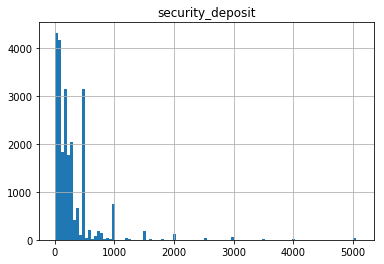

In [381]:
listings_detail.hist(column='security_deposit', bins=100)

In [382]:
listings_detail.security_deposit.describe()

count    23615.000000
mean       293.189453
std        412.670471
min          0.000000
25%        100.000000
50%        200.000000
75%        400.000000
max       5100.000000
Name: security_deposit, dtype: float64

In [383]:
# Group   (these groups are put together after looking at the data)
val_counts = listings_detail.security_deposit.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '0' : 0,
    '1 to 149' : 0,
    '150 to 199' : 0,
    '200 to 249' : 0,
    '250 to 299' : 0,
    '300 to 349' : 0,
    '350 to 499' : 0, 
    '500 to 999' : 0,
    'more than 1000' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount == 0):
        freq['0'] += count_df.counts[i]
    if(0 < amount < 150):
        freq['1 to 149'] += count_df.counts[i]
    elif(150 <= amount < 200):
        freq['150 to 199'] += count_df.counts[i]
    elif(200 <= amount < 250):
        freq['200 to 249'] += count_df.counts[i]
    elif(250 <= amount < 300):
        freq['250 to 299'] += count_df.counts[i]
    elif(300 <= amount < 350):
        freq['300 to 349'] += count_df.counts[i]
    elif(350 <= amount < 500):
        freq['350 to 499'] += count_df.counts[i]
    elif(500 <= amount < 1000):
        freq['500 to 999'] += count_df.counts[i]
    elif(1000 <= amount):
        freq['more than 1000'] += count_df.counts[i]

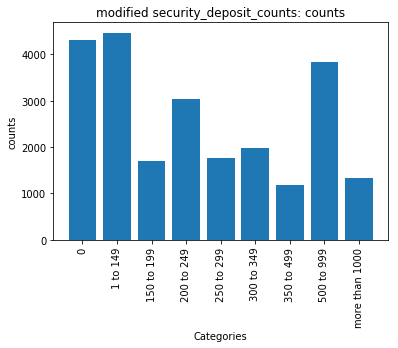

In [384]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified security_deposit_counts' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

In [385]:
### Make the following split: 150 - 249, 250 - 499, 500+ 
listings_detail['security_deposit_buckets'] = listings_detail['security_deposit'].apply(lambda x : '0' if x == 0 else 
                                                                               ('1 to 149' if x < 150 else
                                                                               ('150 to 249' if x < 250 else
                                                                               '250 to 499' if x < 500 else 'more than 500')))

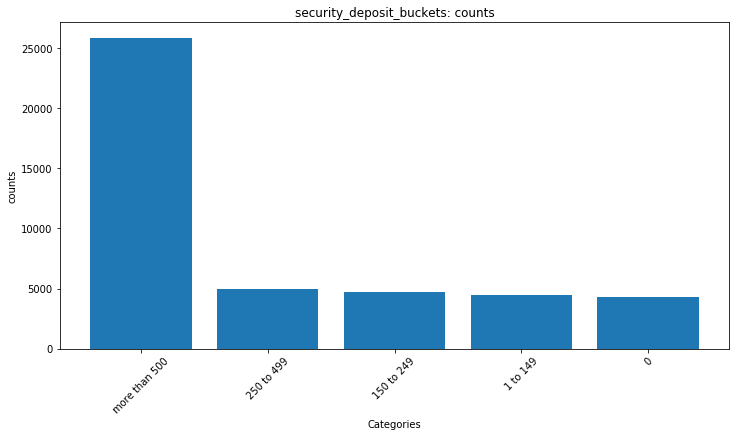

In [386]:
plot_general_distribution(listings_detail, 'security_deposit_buckets')

###### cleaning_fee 

In [387]:
# Clean cleaning_fee  
listings_detail['cleaning_fee'] = listings_detail['cleaning_fee'].str.replace("$","")
listings_detail['cleaning_fee'] = listings_detail['cleaning_fee'].str.replace(",","")
listings_detail.cleaning_fee  = pd.to_numeric(listings_detail.cleaning_fee, downcast = 'float')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FAC0BB860>]],
      dtype=object)

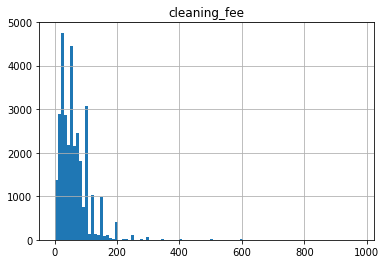

In [388]:
listings_detail.hist(column='cleaning_fee', bins=100)

In [389]:
listings_detail.cleaning_fee.describe()

count    32112.000000
mean        59.789799
std         47.141296
min          0.000000
25%         25.000000
50%         50.000000
75%         80.000000
max        975.000000
Name: cleaning_fee, dtype: float64

In [390]:
# Group   (these groups are put together after looking at the data)
val_counts = listings_detail.cleaning_fee.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '0 to 14' : 0,
    '15 to 24' : 0,
    '25 to 34' : 0,
    '35 to 49' : 0,
    '50 to 64' : 0,
    '65 to 79' : 0,
    '80 to 119' : 0,
    '120 or more' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount < 15):
        freq['0 to 14'] += count_df.counts[i]
    elif(15 <= amount < 25):
        freq['15 to 24'] += count_df.counts[i]
    elif(25 <= amount < 35):
        freq['25 to 34'] += count_df.counts[i]
    elif(35 <= amount < 50):
        freq['35 to 49'] += count_df.counts[i]
    elif(50 <= amount < 65):
        freq['50 to 64'] += count_df.counts[i]
    elif(65 <= amount < 80):
        freq['65 to 79'] += count_df.counts[i]
    elif(80 <= amount < 120):
        freq['80 to 119'] += count_df.counts[i]
    elif(120 <= amount):
        freq['120 or more'] += count_df.counts[i]

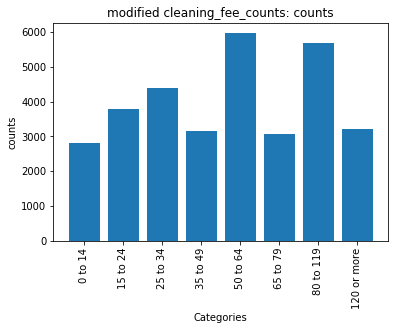

In [391]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified cleaning_fee_counts' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

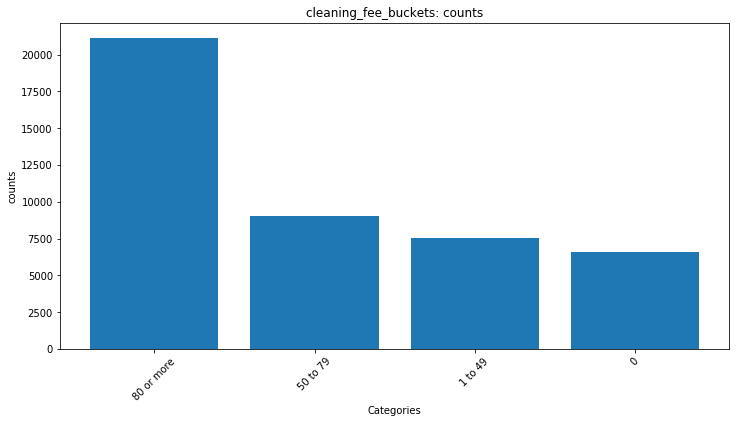

In [392]:
## Per 2 samenne
listings_detail['cleaning_fee_buckets'] = listings_detail['cleaning_fee'].apply(lambda x : '0' if x < 25 else 
                                                                               ('1 to 49' if x < 50 else
                                                                               ('50 to 79' if x < 80 else '80 or more')))
plot_general_distribution(listings_detail, 'cleaning_fee_buckets')

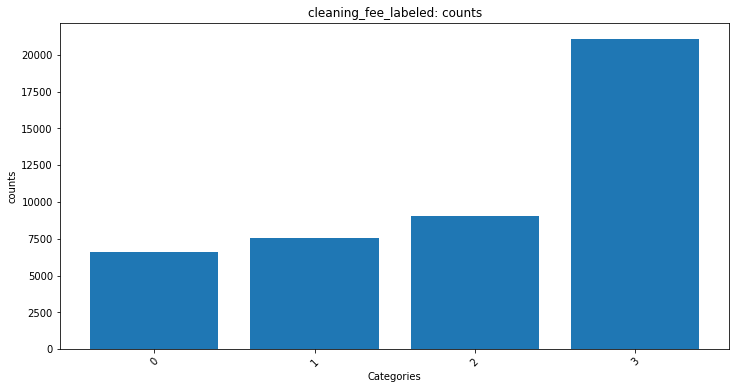

In [393]:
listings_detail['cleaning_fee_labeled'] = LabelEncoder().fit_transform(listings_detail['cleaning_fee_buckets'])
plot_general_distribution(listings_detail, 'cleaning_fee_labeled')

###### guests_included 

In [394]:
listings_detail['guests_included'].value_counts(dropna=False)

1     32287
2      8006
4      1935
3      1120
6       409
5       302
8       121
7        49
10       32
12       14
9        13
16       10
14        7
15        6
11        5
13        1
Name: guests_included, dtype: int64

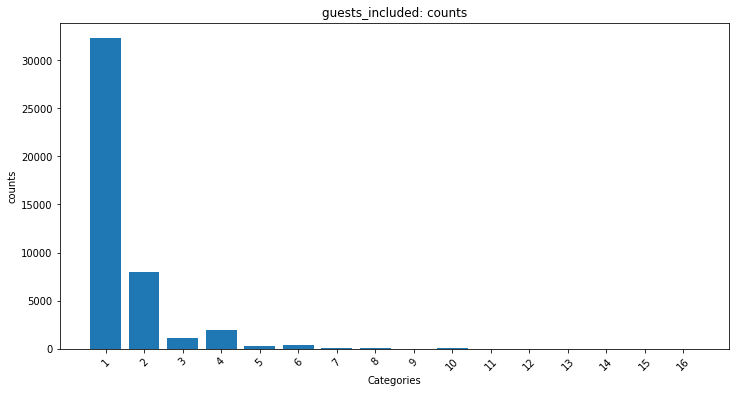

In [395]:
plot_general_distribution(listings_detail, 'guests_included')

In [396]:
# This feature is pretty hard to use

###### extra_people 

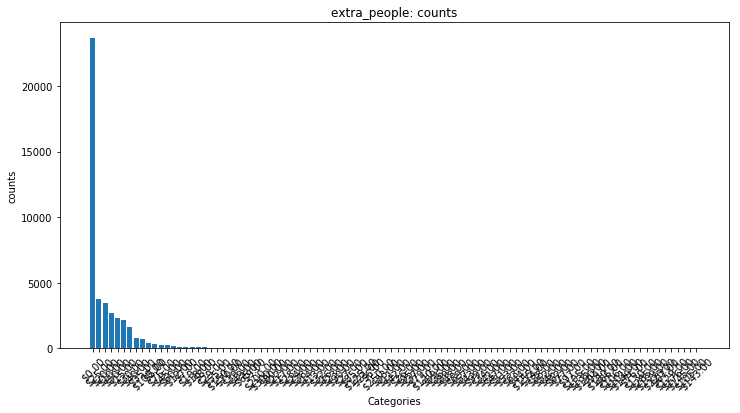

In [397]:
plot_general_distribution(listings_detail, 'extra_people')

In [398]:
# Clean extra_people  
listings_detail['extra_people'] = listings_detail['extra_people'].str.replace("$","")
listings_detail['extra_people'] = listings_detail['extra_people'].str.replace(",","")
listings_detail.extra_people  = pd.to_numeric(listings_detail.extra_people, downcast = 'float')

In [399]:
listings_detail.extra_people.describe()

count    44317.000000
mean        13.911366
std         22.940029
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max        300.000000
Name: extra_people, dtype: float64

In [400]:
# Group   (these groups are put together after looking at the data)
val_counts = listings_detail.extra_people.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '0' : 0, 
    'not 0' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount == 0):
        freq['0'] += count_df.counts[i]
    elif(0 < amount):
        freq['not 0'] += count_df.counts[i]

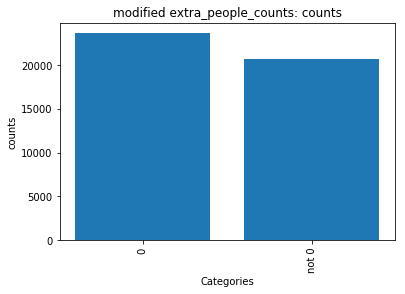

In [401]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified extra_people_counts' + ': counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

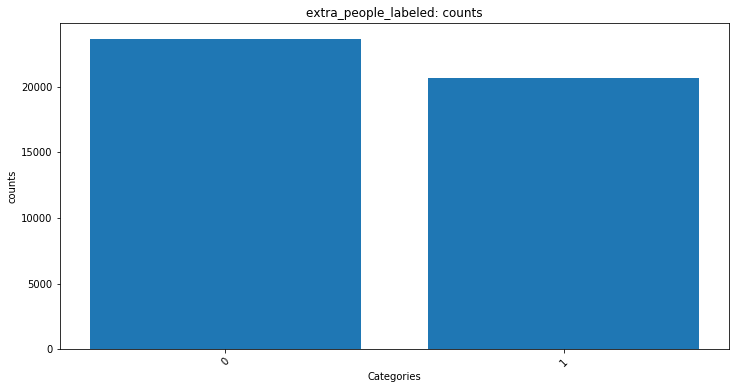

In [402]:
listings_detail['extra_people_labeled'] = listings_detail['extra_people'].apply(lambda x : 0 if x == 0 else 1)
plot_general_distribution(listings_detail, 'extra_people_labeled')

###### minimum_nights 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280A0877C88>]],
      dtype=object)

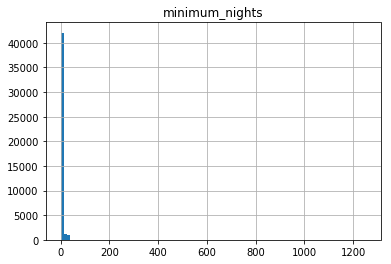

In [403]:
listings_detail.hist(column='minimum_nights', bins=100)

In [404]:
# Hard to make this useful 

###### review_scores_value

In [405]:
listings_detail.review_scores_value.unique()

array([nan, 10.,  9.,  7.,  8.,  6.,  4.,  5.,  2.,  3.])

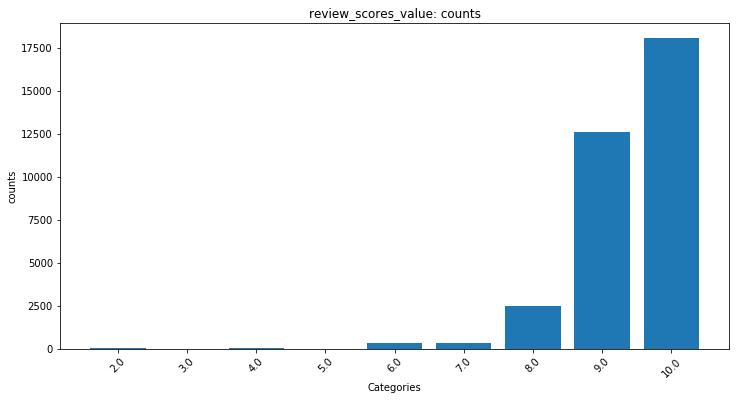

In [406]:
plot_general_distribution(listings_detail, 'review_scores_value')

In [407]:
# Group   (these groups are put together after looking at the data)
val_counts = listings_detail.review_scores_value.value_counts(dropna=False)
cats = np.array(list(val_counts.keys()))
counts = list(val_counts)
count_df = pd.DataFrame({
    'categories' : cats,
    'counts' : counts
})

freq = {
    '<= 8' : 0, 
    'more than 8, less than 10' : 0,
    '10' : 0
}
for i in range(0,len(count_df.categories)):
    amount = count_df.categories[i]
    if(amount <= 8):
        freq['<= 8'] += count_df.counts[i]
    elif(amount < 10):
        freq['more than 8, less than 10'] += count_df.counts[i]
    elif(amount == 10):
        freq['10'] += count_df.counts[i]

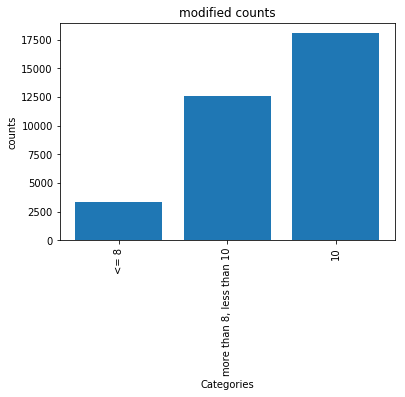

In [408]:
cats = np.array(list(freq.keys()))
counts = list(freq.values())

title = 'modified counts'
Ys = counts
Xs = cats
plt.bar(Xs, Ys)
plt.title(title)
plt.xlabel('Categories')
plt.ylabel('counts')
plt.xticks(Xs, Xs, rotation='vertical')
plt.show()

In [409]:
listings_detail['review_scores_value_labeled'] = listings_detail['review_scores_value'].apply(lambda x : '10' if x == 10 else(
                                                                                             '9' if x == 9 else '8 or less'))

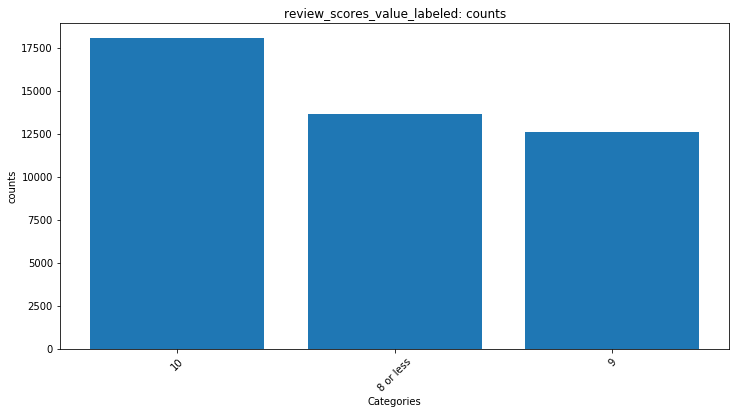

In [410]:
plot_general_distribution(listings_detail, 'review_scores_value_labeled')

###### requires_license

In [411]:
listings_detail.requires_license.unique()

array(['f'], dtype=object)

In [412]:
# Not useful 

###### instant_bookable

In [413]:
listings_detail.instant_bookable.unique()

array(['f', 't'], dtype=object)

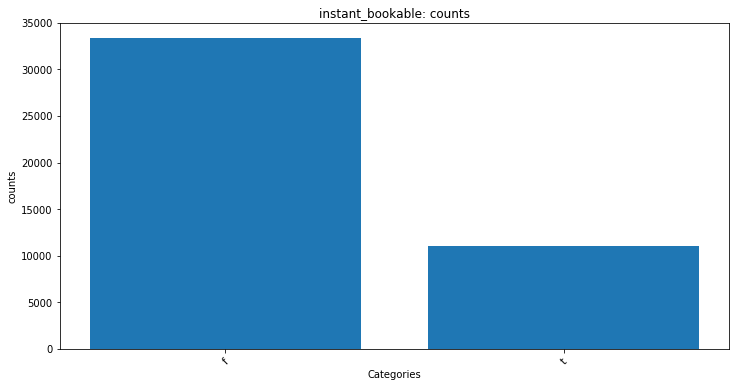

In [414]:
plot_general_distribution(listings_detail, 'instant_bookable')

In [415]:
# Clearly more often false (!!!careful when using)

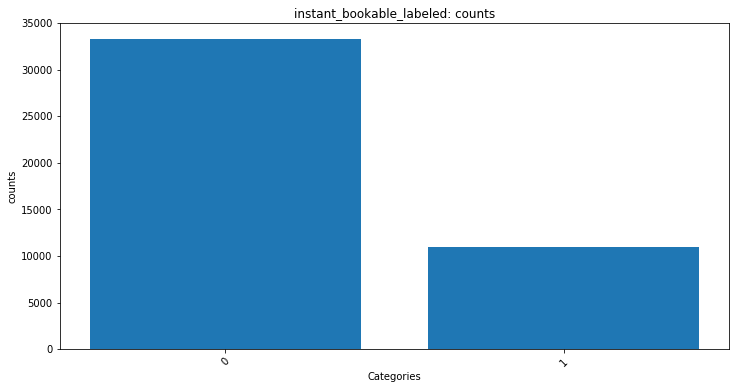

In [416]:
listings_detail['instant_bookable_labeled'] = listings_detail['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)
plot_general_distribution(listings_detail, 'instant_bookable_labeled')

###### is_business_travel_ready

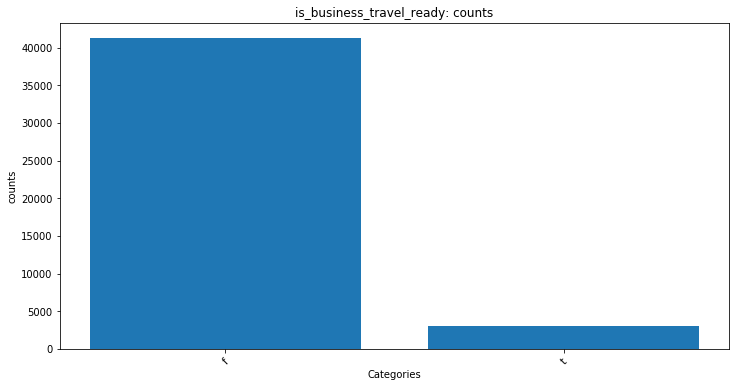

In [417]:
plot_general_distribution(listings_detail, 'is_business_travel_ready')

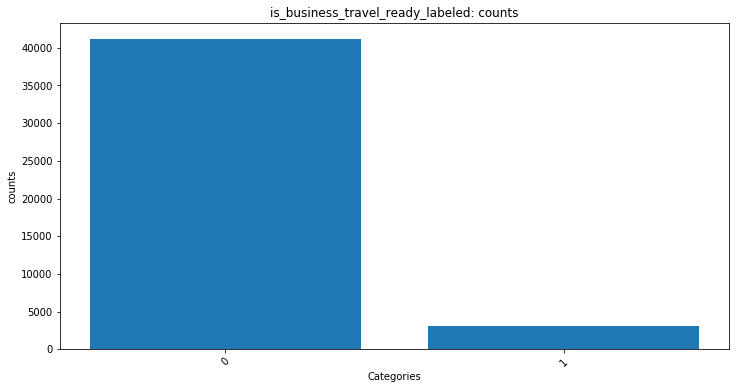

In [418]:
listings_detail['is_business_travel_ready_labeled'] = listings_detail['is_business_travel_ready'].apply(lambda x: 1 if x == 't' else 0)
plot_general_distribution(listings_detail, 'is_business_travel_ready_labeled')

In [419]:
# Clearly more often false (!!!careful when using)

###### cancellation_policy

In [420]:
listings_detail.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30', 'long_term',
       'super_strict_60'], dtype=object)

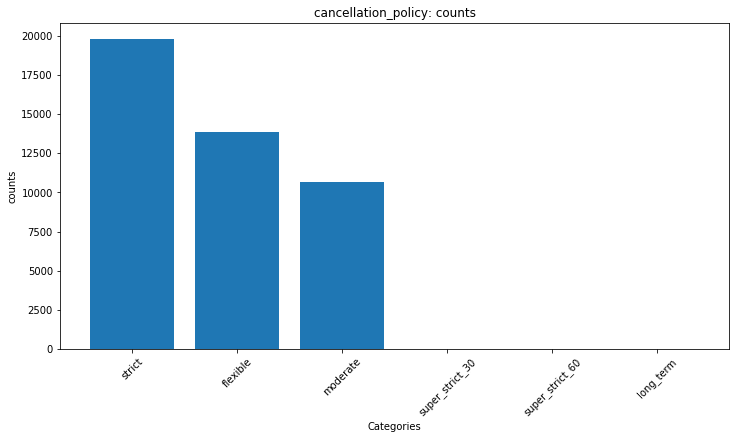

In [421]:
plot_general_distribution(listings_detail, 'cancellation_policy')

In [422]:
# Seems to be ok for strict, flexible, moderate

In [423]:
listings_detail['cancellation_policy_bucketed'] = listings_detail['cancellation_policy'].apply(lambda x : 'strict' if x == 'super_strict_30' else x)
listings_detail['cancellation_policy_bucketed'] = listings_detail['cancellation_policy_bucketed'].apply(lambda x : 'strict' if x == 'super_strict_60' else x)
listings_detail['cancellation_policy_bucketed'] = listings_detail['cancellation_policy_bucketed'].apply(lambda x : 'strict' if x == 'long_term' else x)

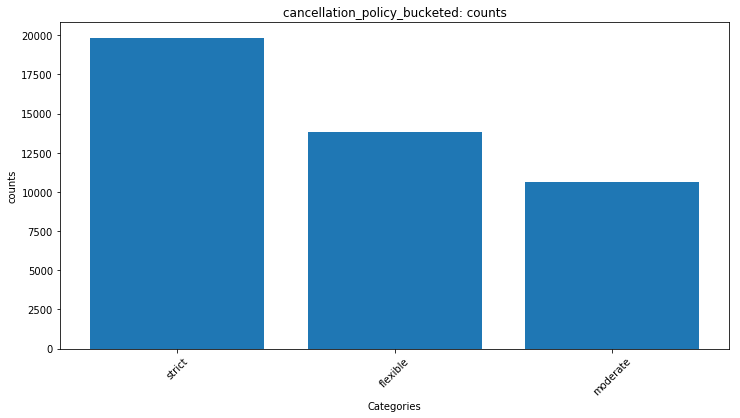

In [424]:
plot_general_distribution(listings_detail, 'cancellation_policy_bucketed')

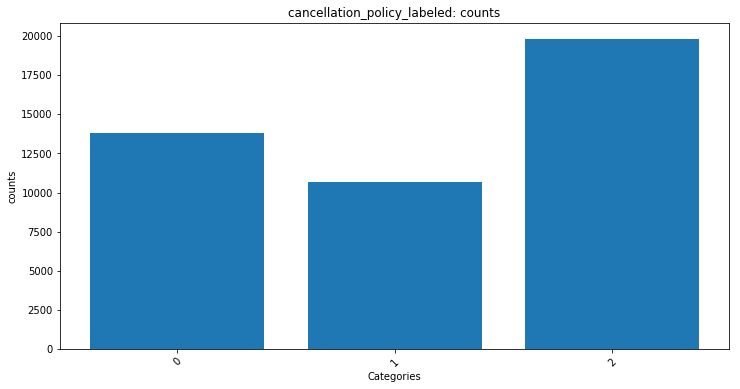

In [425]:
listings_detail['cancellation_policy_labeled'] = LabelEncoder().fit_transform(listings_detail['cancellation_policy_bucketed'])
plot_general_distribution(listings_detail, 'cancellation_policy_labeled')

###### require_guest_profile_picture

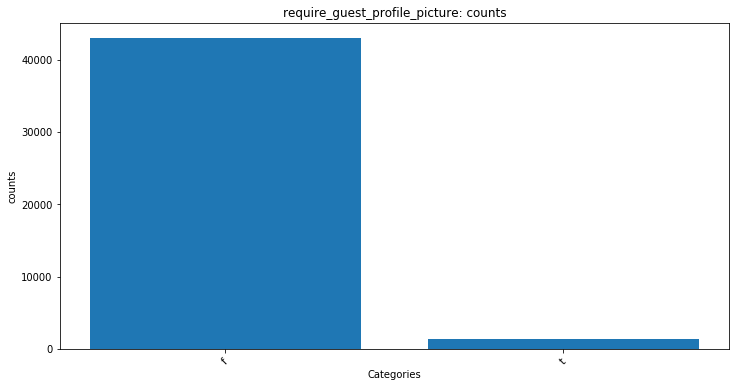

In [426]:
plot_general_distribution(listings_detail, 'require_guest_profile_picture')

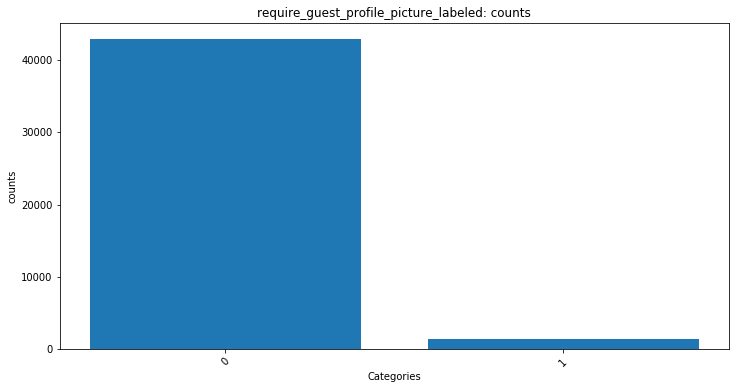

In [427]:
# This one will probably not be very interesting 
listings_detail['require_guest_profile_picture_labeled'] = listings_detail['require_guest_profile_picture'].apply(lambda x : 1 if x == 't' else 0)
plot_general_distribution(listings_detail, 'require_guest_profile_picture_labeled')

###### require_guest_phone_verification

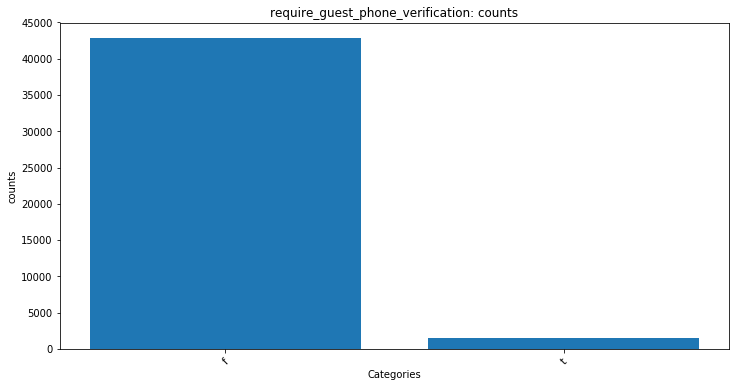

In [428]:
plot_general_distribution(listings_detail, 'require_guest_phone_verification')

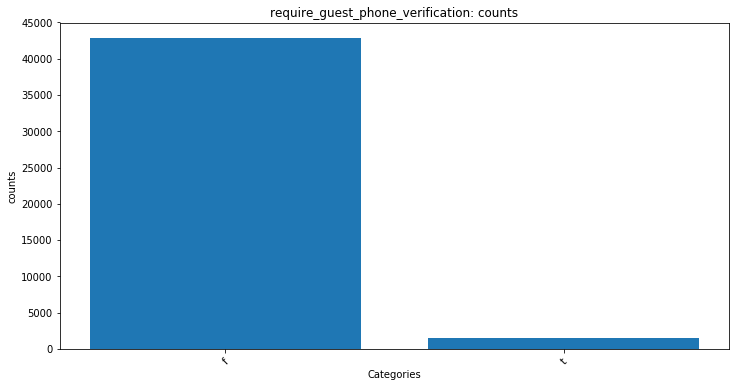

In [429]:
# This one will probably not be very interesting 
listings_detail['require_guest_phone_verification_labeled'] = listings_detail['require_guest_phone_verification'].apply(lambda x : 1 if x == 't' else 0)
plot_general_distribution(listings_detail, 'require_guest_phone_verification')

 ###### calculated_host_listings_count    (already done)

In [430]:
listings_detail.calculated_host_listings_count.unique()

array([ 1,  4,  5,  3,  2,  8,  6,  7,  9, 11, 15, 12, 10, 35, 13, 16, 28,
       31], dtype=int64)

In [431]:
listings_detail.host_listings_count.unique()

array([  1.,   4.,   5.,   3.,   2.,   8.,   6.,   0.,  nan,  12.,  16.,
        11.,   9.,  24.,  14.,   7.,  20.,  15.,  10.,  19.,  47.,  23.,
        22.,  35.,  17.,  13.,  39., 236.,  27., 296.,  94., 979.,  18.,
        31.,  41.,  28., 159.,  46.,  21.,  49., 113.,  38.,  42.,  33.,
       258.,  54., 248.,  25.,  85., 316.,  52.,  64.,  56., 149., 648.,
        83.,  36., 218.])

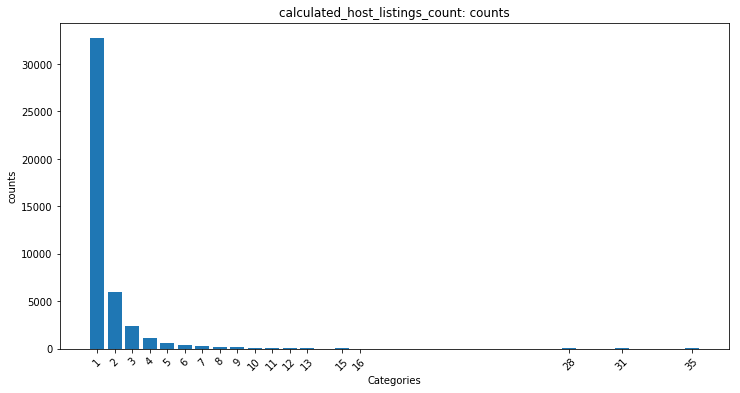

In [432]:
plot_general_distribution(listings_detail, 'calculated_host_listings_count')

In [433]:
# similar to host_listings_count

# Train test split

In [453]:
features_to_train = [#'host_response_time',
                    'host_is_superhost',
                    'calculated_host_listings_count_labeled',
                    'host_has_profile_pic',
                    'host_identity_verified',
                    'neighbourhood_group_cleansed_labeled',
                    'room_type_labeled',
                    'accommodates_labeled',
                    'bathrooms_labeled',
                    #'beds_labeled',
                    #'bed_type',
                    #'security_deposit',
                    #'cleaning_fee_bucket',
                    'extra_people_labeled',
                    #'review_scores_value_labeled',
                    'instant_bookable_labeled',
                    'is_business_travel_ready_labeled',
                    'require_guest_profile_picture_labeled',
                    'require_guest_phone_verification_labeled']

In [454]:
X = listings_detail[features_to_train]
y = listings_detail.price_bucket

In [455]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (35453, 13) (35453,)
Test set: (8864, 13) (8864,)


###### KNN 

In [457]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [458]:
yhat = neigh.predict(X_test)
yhat

array(['Relatively cheap', 'Expensive', 'Relatively cheap', ...,
       'Moderate', 'Relatively cheap', 'Relatively cheap'], dtype=object)

In [459]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5403491947084873
Test set Accuracy:  0.5205324909747292


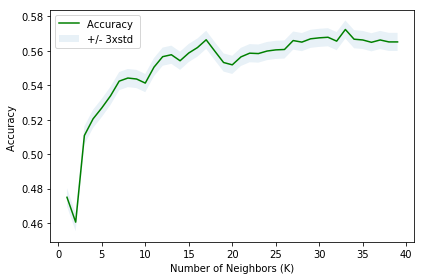

In [460]:
# Calculate different accuracies
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [156]:
# The maximum test accuracy we can get out of the KNN method is about 50% (using a K that is too high will lead to overfitting) 

###### Random Forest

In [461]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 2000, random_state = 0)
forest.fit(X_train, y_train)

print('Accuracy on training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test subset: {:3f}'.format(forest.score(X_test,y_test)))

Accuracy on training subset: 0.602262
Accuracy on test subset: 0.569156


In [158]:
# Clearly overfitting